## Assignment 4 : ECE 8410 : Computer Vision

### Aniruddha Das 201715695

In [1]:
from skimage.io import imread
from skimage.io import imshow
from skimage.color import rgb2gray
import scipy
from scipy import signal as sig
import numpy as np

In [2]:
img = imread('TestImg2.jpg')

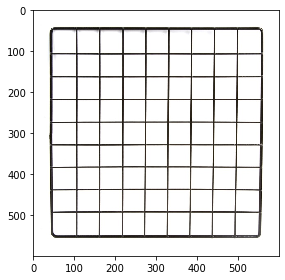

In [3]:
imshow(img)

## Harris Corner

In [4]:
def harriscorner(img):
    imggray = rgb2gray(img)
    corner_img = np.copy(img)
    
    def gradient_x(imggray):
        ##Sobel operator kernels.
        kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
        return sig.convolve2d(imggray, kernel_x, mode='same')
    def gradient_y(imggray):
        kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
        return sig.convolve2d(imggray, kernel_y, mode='same')

    I_x = gradient_x(imggray)
    I_y = gradient_y(imggray)
    
    Ixx = scipy.ndimage.gaussian_filter(I_x**2, sigma=1)
    Ixy = scipy.ndimage.gaussian_filter(I_y*I_x, sigma=1)
    Iyy = scipy.ndimage.gaussian_filter(I_y**2, sigma=1)
    
    k = 0.05

    # determinant
    detS = Ixx * Iyy - Ixy ** 2
    # trace
    traceS = Ixx + Iyy

    harris_cornerness_responses = detS - k * traceS ** 2
    
    
    for rowindex, response in enumerate(harris_cornerness_responses):
        for colindex, r in enumerate(response):
            if r > 0.1:
                # this is a corner
                corner_img[rowindex, colindex] = [255,0,0]
                
    return corner_img

In [5]:
cornerpoints = harriscorner(img)

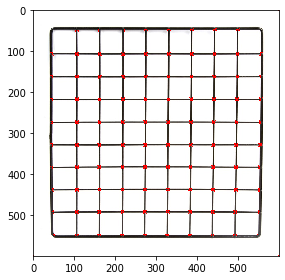

In [6]:
imshow(cornerpoints)

## Patch Matching

In [8]:
img_p_1 = imread('TestImg3_1.jpg')
img_p_2 = imread('TestImg3_2.jpg')

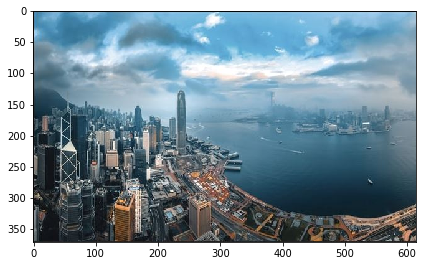

In [9]:
imshow(img_p_1)

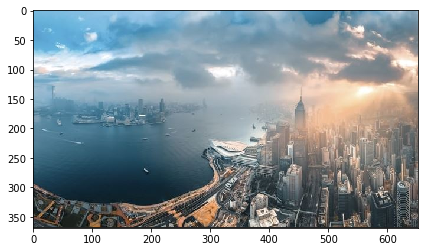

In [10]:
imshow(img_p_2)

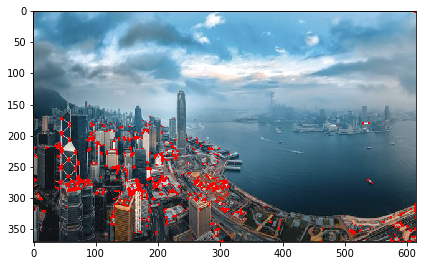

In [11]:
imshow(harriscorner(img_p_1))

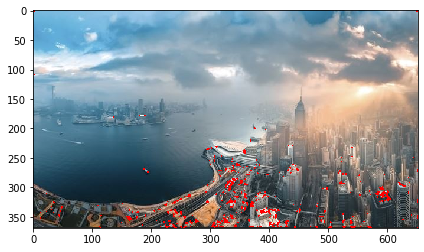

In [12]:
imshow(harriscorner(img_p_2))